# 4ª Versão

In [1]:
!pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#### Tratando o Dataframe

In [4]:
df = pd.read_excel('Scout final.xlsx')
df.head()

,Unnamed: 0,Clube,Rodada,Resultado,Posse de Bola,Gols Feitos,Gols Sofridos,Total de Chutes,Faltas Cometidas,Escanteio,Chute ao Gol,Passes Certos,Total de Passes,Defesas,Faltas sofridas,Chutes Errados,Divididas Ganhas
0,0,Santos,1,D,66,0,3,12,9,11,4,501,563,0,18,5,9
1,18,Flamengo,1,V,62,1,0,14,25,3,10,440,503,5,21,3,9
2,17,Palmeiras,1,D,38,0,1,12,21,4,5,244,300,8,25,6,11
3,16,Corinthians,1,D,61,0,1,15,18,10,6,431,518,1,14,5,10
4,15,Atlético Goianiense,1,V,40,1,0,7,14,3,2,254,351,6,15,3,11


In [5]:
# Utilizando o dummie para transformar a variavel categorica em binaria
df1 = pd.get_dummies(df, columns=['Resultado'])
df1.head()

,Unnamed: 0,Clube,Rodada,Posse de Bola,Gols Feitos,Gols Sofridos,Total de Chutes,Faltas Cometidas,Escanteio,Chute ao Gol,Passes Certos,Total de Passes,Defesas,Faltas sofridas,Chutes Errados,Divididas Ganhas,Resultado_D,Resultado_E,Resultado_V
0,0,Santos,1,66,0,3,12,9,11,4,501,563,0,18,5,9,1,0,0
1,18,Flamengo,1,62,1,0,14,25,3,10,440,503,5,21,3,9,0,0,1
2,17,Palmeiras,1,38,0,1,12,21,4,5,244,300,8,25,6,11,1,0,0
3,16,Corinthians,1,61,0,1,15,18,10,6,431,518,1,14,5,10,1,0,0
4,15,Atlético Goianiense,1,40,1,0,7,14,3,2,254,351,6,15,3,11,0,0,1


In [6]:
# excluindo as colunas que não serão utilizadas
df2=df1.drop(columns=['Unnamed: 0','Clube','Rodada','Resultado_E','Resultado_D'])
df2=df2.rename(columns={'Resultado_V':'Vitória'})
df2

,Posse de Bola,Gols Feitos,Gols Sofridos,Total de Chutes,Faltas Cometidas,Escanteio,Chute ao Gol,Passes Certos,Total de Passes,Defesas,Faltas sofridas,Chutes Errados,Divididas Ganhas,Vitória
0,66,0,3,12,9,11,4,501,563,0,18,5,9,0
1,62,1,0,14,25,3,10,440,503,5,21,3,9,1
2,38,0,1,12,21,4,5,244,300,8,25,6,11,0
3,61,0,1,15,18,10,6,431,518,1,14,5,10,0
4,40,1,0,7,14,3,2,254,351,6,15,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,63,2,0,12,23,4,5,450,530,3,15,5,3,1
756,72,0,2,21,6,12,8,559,636,2,13,5,2,0
757,62,0,1,21,16,11,4,593,662,4,8,11,8,0
758,41,1,0,4,15,1,1,313,387,4,14,3,10,1


In [7]:
# Normalizando os dados

scaler = StandardScaler()

X=df2[['Posse de Bola','Gols Feitos','Gols Sofridos','Total de Chutes','Faltas Cometidas','Escanteio','Chute ao Gol','Passes Certos','Total de Passes','Defesas','Faltas sofridas','Chutes Errados','Divididas Ganhas']]

Y=df2['Vitória']

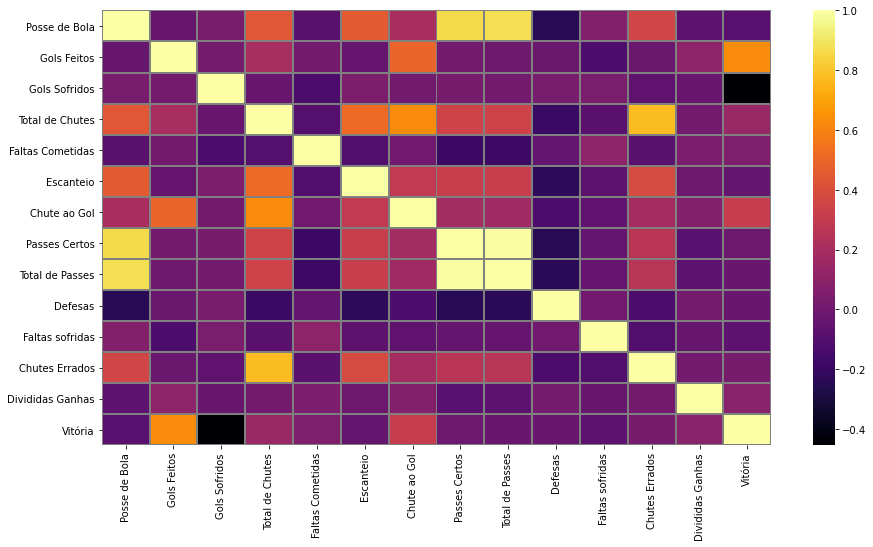

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15, 8))
sns.heatmap(df2.corr(), cmap='inferno', linecolor='gray', linewidths=1);

In [9]:
# Usando o Random Forest para rankear as variaveis
randomForest = RandomForestClassifier(n_estimators=13)
randomForest.fit(X, Y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

print(randomForest.feature_importances_)

[0.03247465 0.42939079 0.29442315 0.01628445 0.01930132 0.01933733
 0.05098214 0.02641312 0.02864137 0.01040749 0.02364943 0.02225418
 0.02644058]


In [10]:
feature_importances = pd.DataFrame(randomForest.feature_importances_,
                                   index = X.columns,
                                   columns=['Score']).sort_values('Score', ascending=False)
feature_importances

,Score
Gols Feitos,0.429391
Gols Sofridos,0.294423
Chute ao Gol,0.050982
Posse de Bola,0.032475
Total de Passes,0.028641
Divididas Ganhas,0.026441
Passes Certos,0.026413
Faltas sofridas,0.023649
Chutes Errados,0.022254
Escanteio,0.019337


In [11]:
feature_importances.head(2)

,Score
Gols Feitos,0.429391
Gols Sofridos,0.294423


## Regressão Multipla

In [12]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
model = LinearRegression()

### Gols Feitos

##### Transição Ofensiva

In [14]:
X_off = df2[['Gols Feitos','Posse de Bola','Escanteio','Chute ao Gol','Total de Passes','Faltas sofridas','Chutes Errados','Divididas Ganhas']]

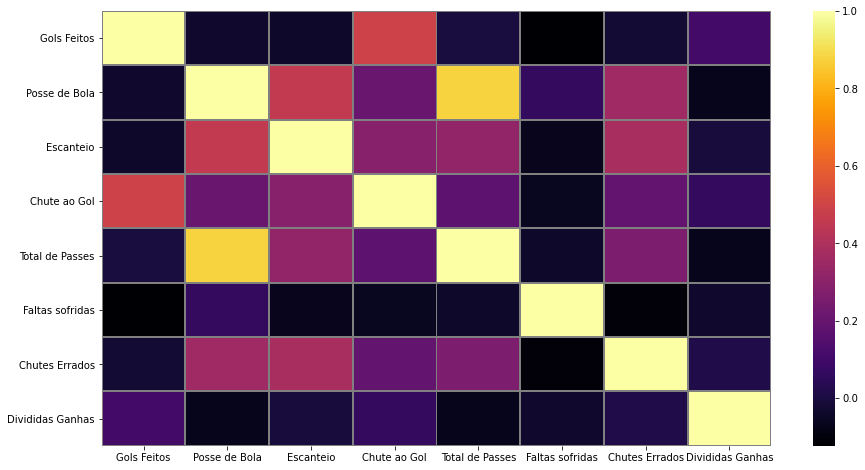

In [15]:
plt.subplots(figsize=(15, 8))
sns.heatmap(X_off.corr(), cmap='inferno', linecolor='gray', linewidths=1);

In [16]:
X1_1 = df['Gols Feitos']
X1_2 = df['Posse de Bola']
X1_3 = df['Escanteio']
X1_4 = df['Chute ao Gol']
X1_5 = df['Total de Passes']
X1_6 = df['Faltas sofridas']
X1_7 = df['Chutes Errados']
X1_8 = df['Divididas Ganhas']

In [17]:
x1 = df2[['Posse de Bola','Escanteio','Chute ao Gol','Total de Passes','Faltas sofridas','Chutes Errados','Divididas Ganhas']]

y1 = df2['Gols Feitos']

# normalizando os dados
scaler.fit(x1)
x1_std = scaler.transform(x1)

# carregando o modelo
model.fit(x1_std, y1)

# retorna a
a1 = model.coef_

# retorna b
b1 = model.intercept_

# retorna R²
r2_1 = model.score(x1_std, y1)

# retorna o erro
y_p1=model.predict(x1_std)
e1=np.sqrt(mean_squared_error(y1, y_p1))

print(f''' Gols Feitos

Constante = {b1}
R² = {r2_1}
RMSE = {e1}
''')

 Gols Feitos

Constante = 1.107894736842105
R² = 0.30075527186847706
RMSE = 0.875528100303862



In [18]:
slope, intercept, r_value, p_value_x1_2, std_err = stats.linregress(X1_2, X1_1)
slope, intercept, r_value, p_value_x1_3, std_err = stats.linregress(X1_3, X1_1)
slope, intercept, r_value, p_value_x1_4, std_err = stats.linregress(X1_4, X1_1)
slope, intercept, r_value, p_value_x1_5, std_err = stats.linregress(X1_5, X1_1)
slope, intercept, r_value, p_value_x1_6, std_err = stats.linregress(X1_6, X1_1)
slope, intercept, r_value, p_value_x1_7, std_err = stats.linregress(X1_7, X1_1)
slope, intercept, r_value, p_value_x1_8, std_err = stats.linregress(X1_8, X1_1)

p_value_GF = [p_value_x1_2,p_value_x1_3,p_value_x1_4,p_value_x1_5,p_value_x1_6,p_value_x1_7,p_value_x1_8]

In [19]:
corr_GF = pd.DataFrame({'Parametros':x1.columns,'coefs':model.coef_,'p value':p_value_GF})
corr_GF.round(4).sort_values('coefs', ascending=False)

,Parametros,coefs,p value
2,Chute ao Gol,0.5769,0.0000
6,Divididas Ganhas,0.0650,0.0034
3,Total de Passes,0.0382,0.9925
5,Chutes Errados,-0.0611,0.6025
0,Posse de Bola,-0.0782,0.3689
4,Faltas sofridas,-0.1028,0.0007
1,Escanteio,-0.1651,0.3104


In [20]:
GF = pd.DataFrame({'Scout':'Gols Feitos','R²':r2_1,'Parametros':x1.columns,'coefs':model.coef_,'p value':p_value_GF})
GF = GF.round(4).sort_values('coefs',ascending=False)
Gols_Feitos = GF.drop([1,0,4,5])
Gols_Feitos

,Scout,R²,Parametros,coefs,p value
2,Gols Feitos,0.3008,Chute ao Gol,0.5769,0.0000
6,Gols Feitos,0.3008,Divididas Ganhas,0.0650,0.0034
3,Gols Feitos,0.3008,Total de Passes,0.0382,0.9925


In [21]:
x4 = df2[['Gols Feitos','Chute ao Gol','Total de Passes','Divididas Ganhas']]
scaler.fit(x4)
x4_std = scaler.transform(x4)

In [22]:
nw_1 = pd.DataFrame(x4_std)
nw_1.rename(columns={0:'Gols Feitos',1:'Chute ao Gol',2:'Total de Passes',3:'Divididas Ganhas'}, inplace=True)
nw_1

,Gols Feitos,Chute ao Gol,Total de Passes,Divididas Ganhas
0,-1.058140,-0.059545,1.387396,0.053989
1,-0.103049,2.628843,0.781186,0.053989
2,-1.058140,0.388519,-1.269823,0.661866
3,-1.058140,0.836584,0.932739,0.357927
4,-0.103049,-0.955675,-0.754545,0.661866
...,...,...,...,...
755,0.852041,0.388519,1.053981,-1.769641
756,-1.058140,1.732713,2.124951,-2.073580
757,-1.058140,-0.059545,2.387642,-0.249949
758,-0.103049,-1.403740,-0.390819,0.357927


In [23]:
y = nw_1['Gols Feitos']
x111 = nw_1['Chute ao Gol']
x = nw_1[['Chute ao Gol','Total de Passes','Divididas Ganhas']]

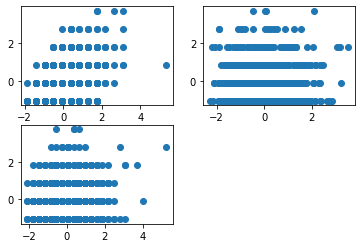

In [24]:
plt.subplot(2,2,1)
plt.scatter(nw_1['Chute ao Gol'],y)
plt.subplot(2,2,2)
plt.scatter(nw_1['Total de Passes'],y)
plt.subplot(2,2,3)
plt.scatter(nw_1['Divididas Ganhas'],y)

Text(0.5, 0, 'Total de Passes')

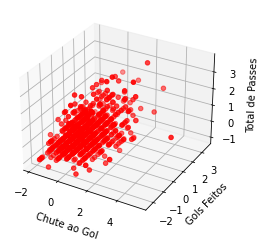

In [25]:
import matplotlib.pyplot as plt
y = nw_1['Gols Feitos']
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1_1 = nw_1["Chute ao Gol"]
x2_1 = nw_1["Total de Passes"]
ax.scatter(x1_1, x2_1, y, c='r', marker='o')
# Set axis labels
ax.set_xlabel('Chute ao Gol')
ax.set_ylabel('Gols Feitos')
ax.set_zlabel('Total de Passes')

#### Exemplo de Treino

##### Treino A

Jogam 11×11. O jogo sempre inicia com a equipe azul atacando, sendo que a equipe vermelha marca em bloco baixo. O objetivo da equipe azul será tocar o minimo de 20 passes em espaço reduzido e assim criar e aproveitar espaços na estrutura adversária para marcar gol. Se os vermelhos conseguirem roubar a bola, deverão contra-atacar rapidamente o azul.

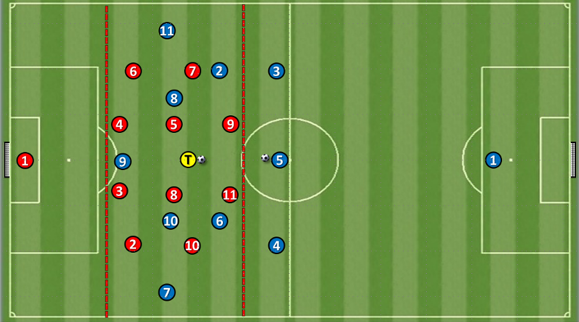

##### Treino B

Campo dividido ao meio, exercício estruturado com 4 equipes de 3 jogadores cada. O exercício está configurado para que hajam situações de 3×2 + goleiro permanentemente. No exemplo acima 3 azuis atacam dois vermelhos, que tem um jogador posicionado como referência para contra-ataque no campo adversário (defendido por 2 pretos). O objetivo da equipe azul é fazer gol, enquanto que o da equipe vermelha é recuperar a posse da bola e contra-atacar rapidamente, passando a bola para o seu referência que está no campo ofensivo.

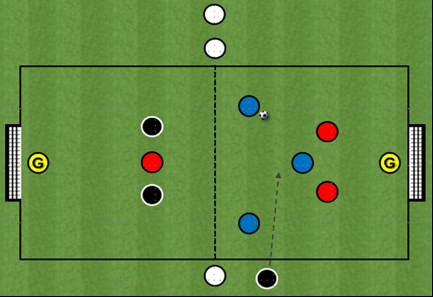

##### Treino C

O espaço de jogo está dividido em duas partes. O exercício inicia numa situação de 7 azuis contra 5 vermelhos (o centroavante não participa sem bola), com a posse de bola sempre iniciando com os azuis. O objetivo da equipe azul é marcar gol em uma das 4 mini-balizas defendidas pelos vermelhos, que têm como finalidade recuperar a posse da bola e contra-atacar rapidamente. Neste momento o centroavante passa a jogar, servindo como opção de profundidade, sendo que os 6 vermelhos têm apenas 10 segundos para terminar a ação ofensiva.

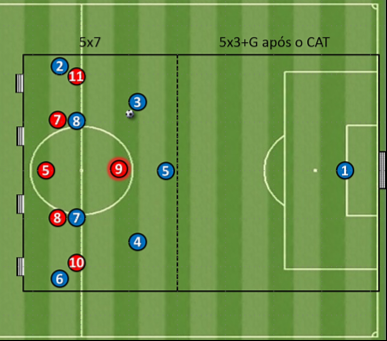

### Gols Sofridos

##### Transição Defensiva

In [26]:
X_deff =df2[['Gols Sofridos','Posse de Bola','Faltas Cometidas','Total de Passes','Defesas','Divididas Ganhas']]

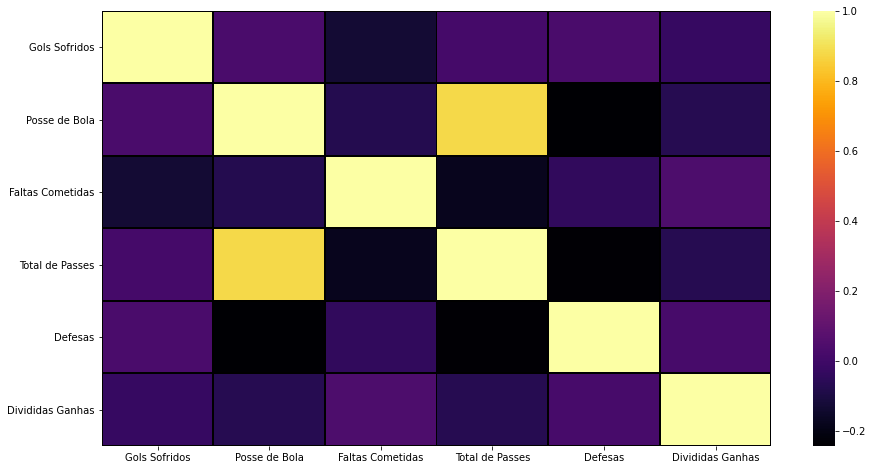

In [27]:
plt.subplots(figsize=(15, 8))
sns.heatmap(X_deff.corr(), cmap='inferno', linecolor='black', linewidths=1);

In [28]:
X2_1 = df['Gols Sofridos']
X2_2 = df['Posse de Bola']
X2_3 = df['Defesas']
X2_4 = df['Faltas Cometidas']
X2_5 = df['Total de Passes']
X2_6 = df['Divididas Ganhas']

In [29]:
x2 = df2[['Posse de Bola','Defesas','Faltas Cometidas','Total de Passes','Divididas Ganhas']]

y2 = df2['Gols Sofridos']

# normalizando os dados0
scaler.fit(x2)
x2_std = scaler.transform(x2)

# carregando o modelo
model.fit(x2_std, y2)

# retorna a
a2 = model.coef_

# retorna b
b2 = model.intercept_

# retorna R²
r2_2 = model.score(x2_std, y2)

# retorna o erro
y_p2=model.predict(x2_std)
e2=np.sqrt(mean_squared_error(y2, y_p2))

print(f''' Gols Sofridos

Constante = {b2}
R² = {r2_2}
RMSE = {e2}
''')

 Gols Sofridos

Constante = 1.1078947368421053
R² = 0.021901119698145455
RMSE = 1.0354922907969348



In [30]:
slope, intercept, r_value, p_value_x2_2, std_err = stats.linregress(X2_2, X2_1)
slope, intercept, r_value, p_value_x2_3, std_err = stats.linregress(X2_3, X2_1)
slope, intercept, r_value, p_value_x2_4, std_err = stats.linregress(X2_4, X2_1)
slope, intercept, r_value, p_value_x2_5, std_err = stats.linregress(X2_5, X2_1)
slope, intercept, r_value, p_value_x2_6, std_err = stats.linregress(X2_6, X2_1)

p_value_GS = [p_value_x2_2,p_value_x2_3,p_value_x2_4,p_value_x2_5,p_value_x2_6]

In [31]:
corr_GS = pd.DataFrame({'Parametros':x2.columns,'coefs':model.coef_,'p value':p_value_GS})
corr_GS.round(4).sort_values('coefs')

,Parametros,coefs,p value
2,Faltas Cometidas,-0.1455,0.0004
3,Total de Passes,-0.1310,0.6836
4,Divididas Ganhas,-0.0228,0.4400
1,Defesas,0.0298,0.4038
0,Posse de Bola,0.1430,0.3811


In [32]:
GS = pd.DataFrame({'Scout':'Gols Sofridos','R²':r2_2,'Parametros':x2.columns,'coefs':model.coef_,'p value':p_value_GS})
GS = GS.round(4).sort_values('coefs')
Gols_Sofridos = GS.drop([1,0])
Gols_Sofridos

,Scout,R²,Parametros,coefs,p value
2,Gols Sofridos,0.0219,Faltas Cometidas,-0.1455,0.0004
3,Gols Sofridos,0.0219,Total de Passes,-0.1310,0.6836
4,Gols Sofridos,0.0219,Divididas Ganhas,-0.0228,0.4400


In [33]:
x5 = df2[['Gols Sofridos','Total de Passes','Faltas Cometidas','Divididas Ganhas']]
scaler.fit(x5)
x5_std = scaler.transform(x5)

In [34]:
nw_2 = pd.DataFrame(x5_std)
nw_2.rename(columns={0:'Gols Sofridos',1:'Total de Passes',2:'Faltas Cometidas',3:'Divididas Ganhas'}, inplace=True)
nw_2

,Gols Sofridos,Total de Passes,Faltas Cometidas,Divididas Ganhas
0,1.807132,1.387396,-1.418277,0.053989
1,-1.058140,0.781186,2.391365,0.053989
2,-0.103049,-1.269823,1.438954,0.661866
3,-0.103049,0.932739,0.724647,0.357927
4,-1.058140,-0.754545,-0.227764,0.661866
...,...,...,...,...
755,-1.058140,1.053981,1.915160,-1.769641
756,0.852041,2.124951,-2.132585,-2.073580
757,-0.103049,2.387642,0.248441,-0.249949
758,-1.058140,-0.390819,0.010339,0.357927


Text(0.5, 0, 'Faltas Cometidas')

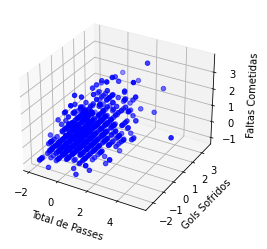

In [35]:
yd = nw_2['Gols Sofridos']
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xd_1 = nw_2["Total de Passes"]
xd_2 = nw_2["Faltas Cometidas"]
ax.scatter(x1_1, x2_1, y, c='b', marker='o')
# Set axis labels
ax.set_xlabel('Total de Passes')
ax.set_ylabel('Gols Sofridos')
ax.set_zlabel('Faltas Cometidas')

#### Exemplo de Treinos

##### Treino A

Variação do Bobinho, o trabalho é realizado em duplas onde cada dupla. Jogam 8×2 ou 6×2, etc., e quando os dois elementos do meio recuperarem a bola, imediatamente a dupla que foi desarmada, ou errou o passe, deve reagir e pressionar para roubar a bola.

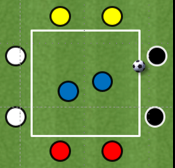

##### Treino B

Formam-se 3 equipes de 4 (posicional), sendo que uma sempre fica no meio marcando. Objetivo das equipes com posse (vermelho e branco) é circular a bola (tanto entre si, em largura, como usar a outra equipe em profundidade para gerar desequilíbrio – opcional), de maneira a criar espaços e fazer gol em uma das 4 mini-balizas. Os azuis devem pressionar (apenas 1 jogador pode saltar e pressionar no campo adversário), cobrir uns aos outros e impedir o gol nas mini-balizas (passe entre linha). Caso consigam recuperar a posse da bola deverão finalizar a bola em uma das balizas grandes, enquanto que as outras duas equipes que estavam com posse, tão logo a perdem, deverão pressionar imediatamente a equipe adversária para impedir o gol e retomar a posse da bola.

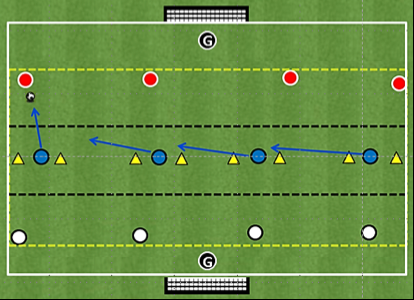

##### Treino C

Jogo em ¾ de campo, sendo que o meio campo é sinalizado pela linha amarela. Ambas equipes estão divididas em duas metades de 5 jogadores. No campo defensivo estão goleiro, linha de 4 e volante, e no campo ofensivo 2 meias e 3 atacantes (estrutura de jogo 1-4-3-3). Poderá haver delimitação de toques; a bola só poderá ir de uma metade à outra com passes rasteiros, longos ou ambos, e etc.

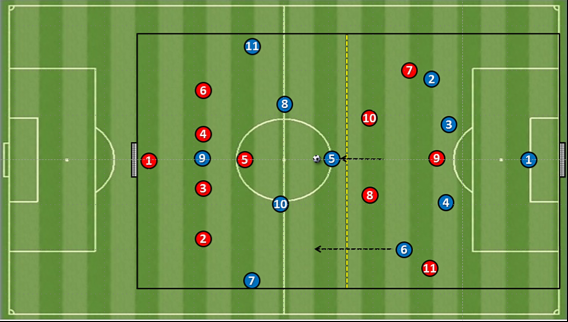

#### Resumo

In [36]:
df_scout = pd.merge(Gols_Feitos,Gols_Sofridos,how='outer')
df_scout.groupby(['Scout','R²','Parametros']).sum().sort_values('R²',ascending=False)

coefs  p value
Scout         R²     Parametros                       
Gols Feitos   0.3008 Chute ao Gol      0.5769   0.0000
                     Divididas Ganhas  0.0650   0.0034
                     Total de Passes   0.0382   0.9925
Gols Sofridos 0.0219 Divididas Ganhas -0.0228   0.4400
                     Faltas Cometidas -0.1455   0.0004
                     Total de Passes  -0.1310   0.6836

In [37]:
Real_of = df.groupby('Clube')[['Gols Feitos','Chute ao Gol','Total de Passes','Divididas Ganhas']].sum().sort_values('Gols Feitos', ascending = False)
Real_of.head(3)

,Gols Feitos,Chute ao Gol,Total de Passes,Divididas Ganhas
Clube,,,,
Flamengo,69,230,19725,386
Atlético Mineiro,67,185,19008,368
Palmeiras,58,184,15917,354


In [38]:
# media de cada estatistica
mean_of = pd.DataFrame(Real_of[['Gols Feitos','Chute ao Gol','Total de Passes','Divididas Ganhas']].median())
mean_of

,0
Gols Feitos,40.5
Chute ao Gol,153.0
Total de Passes,15928.0
Divididas Ganhas,340.0


In [39]:
Real_df = df.groupby('Clube')[['Gols Sofridos','Faltas Cometidas','Total de Passes','Divididas Ganhas']].sum().sort_values('Gols Sofridos', ascending = False)
Real_df

,Gols Sofridos,Faltas Cometidas,Total de Passes,Divididas Ganhas
Clube,,,,
Chapecoense,67,563,13498,339
Bahia,51,584,14774,341
Grêmio,51,643,17188,370
Red Bull Bragantino,46,571,15939,354
Fortaleza,45,591,14941,305
Athletico Paranaense,45,567,16148,299
Juventude,44,572,14621,299
Palmeiras,43,538,15917,354
Internacional,42,660,16232,359


In [40]:
# media de cada estatistica
mean_df = pd.DataFrame(Real_df[['Gols Sofridos','Faltas Cometidas','Total de Passes','Divididas Ganhas']].median())
mean_df

,0
Gols Sofridos,39.5
Faltas Cometidas,569.5
Total de Passes,15928.0
Divididas Ganhas,340.0
